In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)


# reflect the tables
Base.classes.keys()


['measurement', 'station']

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
# We can view all of the classes that automap found
Measurement = Base.classes.measurement
session = Session(engine)

first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20d1a342608>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'date': '2010-01-01'}

In [14]:
Station = Base.classes.station

first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20d1a366388>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [ ]:
# for row in session.query(Measurement,).limit(5).all():
#     print(row)

In [15]:
conn = engine.connect()

engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [17]:
measurement_data = pd.read_sql('SELECT * FROM measurement', conn)

station_data = pd.read_sql('SELECT * FROM station', conn)


In [18]:
station_data

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [19]:
measurement_data.sort_values(by='date', ascending=False)


,id,station,date,prcp,tobs
19549,19550,USC00516128,2017-08-23,0.45,76.0
12186,12187,USC00519523,2017-08-23,0.08,82.0
2723,2724,USC00519397,2017-08-23,0.00,81.0
7634,7635,USC00514830,2017-08-23,0.00,82.0
12185,12186,USC00519523,2017-08-22,0.00,82.0
...,...,...,...,...,...
14959,14960,USC00511918,2010-01-01,0.05,66.0
12187,12188,USC00519281,2010-01-01,0.15,70.0
9518,9519,USC00519523,2010-01-01,0.15,75.0
9007,9008,USC00518838,2010-01-01,0.21,72.0


In [20]:
daily_measurement = measurement_data.groupby(["date"])

average_percip = daily_measurement["prcp"].mean()

average_percip


#daily_measurement.sort_values(by='date', ascending=False)

date
2010-01-01    0.151429
2010-01-02    0.002857
2010-01-03    0.000000
2010-01-04    0.001429
2010-01-05    0.005000
                ...   
2017-08-19    0.030000
2017-08-20    0.005000
2017-08-21    0.193333
2017-08-22    0.166667
2017-08-23    0.132500
Name: prcp, Length: 2792, dtype: float64

In [21]:
combined_data = pd.merge(measurement_data, station_data, on="id", how="inner")
combined_data

,id,station_x,date,prcp,tobs,station_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00519397,2010-01-03,0.00,74.0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00519397,2010-01-04,0.00,76.0,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00519397,2010-01-06,NaN,73.0,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519397,2010-01-07,0.06,70.0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519397,2010-01-08,0.00,64.0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00519397,2010-01-09,0.00,68.0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00519397,2010-01-10,0.00,73.0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Climate Analysis

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)



Query Date:  2016-08-23


In [23]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, func.avg(Measurement.prcp)).\
    filter(Measurement.date > query_date).group_by(Measurement.date).order_by(Measurement.date).all()

results

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [26]:
# Save the query results as a Pandas DataFrame and set the index to the date column

results_df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
results_df.set_index('Date', inplace=True)

results_df.head()

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


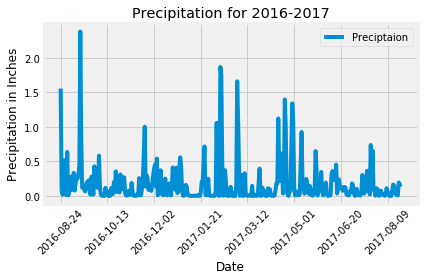

In [34]:
# Use Pandas Plotting with Matplotlib to plot the data

results_df.plot()
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.title("Precipitation for 2016-2017")
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()


In [1]:
#test for FLASK
result_list = []

for date, prcp in results:
    result_dict = {date: prcp}
    result_list.append(result_dict)
    
result_list   
    

In [40]:
active_station = session.query(Measurement.date, (Measurement.tobs)).\
    filter(Measurement.date > query_date).all()

active_station

[('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 77.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 78.0),
 ('2016-09-22', 76.0),
 ('2016-09-23', 82.0),
 ('2016-09-24', 81.0),
 ('2016-09-25', 78.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 79.0),
 ('2016-09-29', 80.0),
 ('2016-09-30', 80.0),
 ('2016-10-01', 80.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 80.0),
 ('2016-10-

In [41]:
#Test for Flask

active_station_list = []

for date, tobs in active_station:
    station_dict = {date: tobs}
    active_station_list.append(station_dict)
    
active_station_list 

[{'2016-08-24': 79.0},
 {'2016-08-25': 80.0},
 {'2016-08-26': 79.0},
 {'2016-08-27': 77.0},
 {'2016-08-28': 78.0},
 {'2016-08-29': 78.0},
 {'2016-08-30': 79.0},
 {'2016-08-31': 80.0},
 {'2016-09-01': 81.0},
 {'2016-09-02': 80.0},
 {'2016-09-03': 79.0},
 {'2016-09-04': 75.0},
 {'2016-09-05': 79.0},
 {'2016-09-06': 76.0},
 {'2016-09-07': 76.0},
 {'2016-09-08': 80.0},
 {'2016-09-09': 79.0},
 {'2016-09-10': 78.0},
 {'2016-09-11': 76.0},
 {'2016-09-12': 78.0},
 {'2016-09-13': 78.0},
 {'2016-09-14': 75.0},
 {'2016-09-15': 79.0},
 {'2016-09-16': 80.0},
 {'2016-09-17': 79.0},
 {'2016-09-18': 81.0},
 {'2016-09-19': 77.0},
 {'2016-09-20': 77.0},
 {'2016-09-21': 78.0},
 {'2016-09-22': 76.0},
 {'2016-09-23': 82.0},
 {'2016-09-24': 81.0},
 {'2016-09-25': 78.0},
 {'2016-09-26': 80.0},
 {'2016-09-27': 80.0},
 {'2016-09-28': 79.0},
 {'2016-09-29': 80.0},
 {'2016-09-30': 80.0},
 {'2016-10-01': 80.0},
 {'2016-10-02': 79.0},
 {'2016-10-03': 79.0},
 {'2016-10-04': 79.0},
 {'2016-10-05': 80.0},
 {'2016-10-

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data

results_df.describe()

,Preciptaion
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [25]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(Station.station)).all()

station_count

[(9)]

In [35]:
#test for FLASK

station_list = session.query((Station.station)).all()

station_list

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_freq = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()

station_freq

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

station_sum = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()
                            
station_sum 
    




[(54.0, 85.0, 71.66378066378067)]

In [17]:
#test for FLASK
end_date = "2017, 8, 23"
start_date = "2016, 08, 23"

temp_summary = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.date >= start_date).all()

temp_summary

[(56.0, 87.0, 74.14409066378845)]

In [18]:
temp_list = list(np.ravel(temp_summary))

temp_list

[56.0, 87.0, 74.14409066378845]

In [19]:
# #test for flask
# temp_list = []
# min_temp = []
# avg_temp = []


# for date, tobs in temp_summary:
#     temp_dict = {date: min}
#     temp_list.append(temp_dict)
    
# temp_list 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FB020E5C8>]],
      dtype=object)

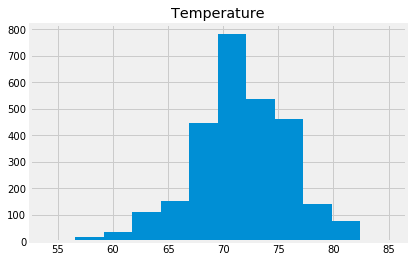

In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

pop_station = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").all()

pop_station_df = pd.DataFrame(pop_station, columns=['Temperature'])

pop_station_df.hist(bins = 12)



## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
